# Important Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import perimeter
from scipy.spatial import distance

# Images path

In [2]:
fig_01_path = '/kaggle/input/lab-01/Lab_01/fig_01.png'
fig_02_path = '/kaggle/input/lab-01/Lab_01/fig_02.png'
fig_03_path = '/kaggle/input/lab-01/Lab_01/fig_03.png'
fig_04_path = '/kaggle/input/lab-01/Lab_01/fig_04.png'
fig_05_path = '/kaggle/input/lab-01/Lab_01/fig_05.png'
fig_06_path = '/kaggle/input/lab-01/Lab_01/fig_06.png'
fig_07_path = '/kaggle/input/lab-01/Lab_01/fig_07.png'

In [3]:
fig_01 = cv2.imread(fig_01_path,cv2.IMREAD_GRAYSCALE)
fig_02 = cv2.imread(fig_02_path,cv2.IMREAD_GRAYSCALE)
fig_03 = cv2.imread(fig_03_path,cv2.IMREAD_GRAYSCALE)
fig_04 = cv2.imread(fig_04_path,cv2.IMREAD_GRAYSCALE)
fig_05 = cv2.imread(fig_05_path,cv2.IMREAD_GRAYSCALE)
fig_06 = cv2.imread(fig_06_path,cv2.IMREAD_GRAYSCALE)
fig_07 = cv2.imread(fig_07_path,cv2.IMREAD_GRAYSCALE)


Display the first image

In [4]:
def show_image(fig_01_path, title = "", cmap='gray'):
    plt.imshow(fig_01_path, cmap = cmap)
    plt.title (title)
    plt.axis ('off')
    plt.show

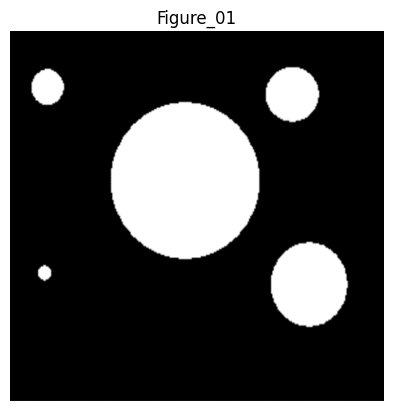

In [5]:
show_image(fig_01,"Figure_01")

   *Q1.	Determine the perimeter of an object by using 4 connected neighborhoods and 8 connected neighborhoods 

# Answer 1

# Perimeter

In [6]:
from scipy.ndimage import binary_erosion
#convert grayscal to binary (0 or 1)
_, binary = cv2.threshold(fig_01, 127, 1, cv2.THRESH_BINARY)


In [7]:
def compute_perimeter(binary_img, connectivity=4):
    struct = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]]) if connectivity == 4 else np.ones((3, 3))
    
    eroded = binary_erosion(binary_img, structure=struct).astype(int)
    perimeter = binary_img - eroded
    return perimeter, int(np.sum(perimeter))

In [8]:
perim4_img, perim4_count = compute_perimeter(binary, connectivity = 4)
perim8_img, perim8_count = compute_perimeter(binary, connectivity = 8)

# Plotting the first figure with Perimeter

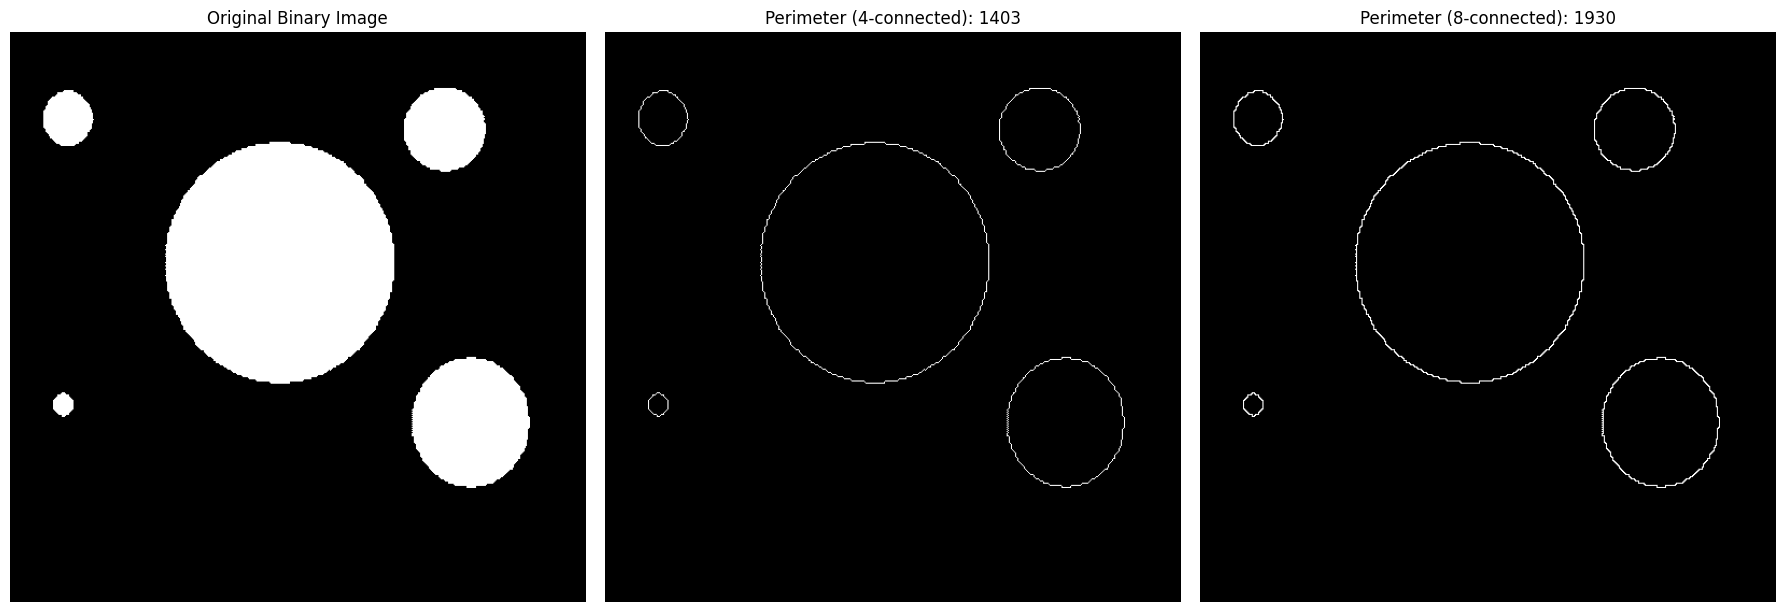

In [9]:
# Display original and both perimeter results
plt.figure(figsize=(18, 6))

# Original binary image
plt.subplot(1, 3, 1)
plt.title('Original Binary Image')
plt.imshow(binary, cmap='gray')
plt.axis('off')

# 4-connected perimeter
plt.subplot(1, 3, 2)
plt.title(f'Perimeter (4-connected): {perim4_count}')
plt.imshow(perim4_img, cmap='gray')
plt.axis('off')

# 8-connected perimeter
plt.subplot(1, 3, 3)
plt.title(f'Perimeter (8-connected): {perim8_count}')
plt.imshow(perim8_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Q2. Create a binary image using a threshold for Figure-2

# **Answer = 2**

In [11]:
def show_image(fig_02_path, title = "", cmap='gray'):
    plt.imshow(fig_02_path, cmap = cmap)
    plt.title (title)
    plt.axis ('off')
    plt.show

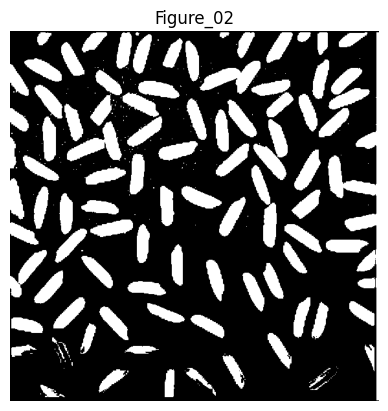

In [12]:
# fig_02 should be a grayscale image for thresholding
_, binary_img = cv2.threshold(fig_02, 127, 255, cv2.THRESH_BINARY)

def show_image(image, title):
    plt.imshow(image, cmap='gray')  # Show image in grayscale
    plt.title(title)
    plt.axis('off')
    plt.show()

# Now show the binary thresholded image
show_image(binary_img, "Figure_02")

Q3.	Determine the number of objects in the binary image generated in Question 2 using the concept of connectivity.

# Answer 3

In [14]:
# Count connected components
num_labels, labels = cv2.connectedComponents(binary_img)

# Exclude background
num_objects = num_labels - 1

print("Number of objects in binary image:", num_objects)



Number of objects in binary image: 256


Q4. Find the Euclidean distance between two points of the image. 

# Answer 4

In [15]:
import numpy as np


point1 = (30.67, 40.67)  
point2 = (100.25, 80.25) 

# Compute Euclidean distance
distance = np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

print("Euclidean distance between the points:", distance)


Euclidean distance between the points: 80.04968956841743


Q4. Apply the following operations using Fig.1 and Fig.2:
a.	Addition 
b.	Subtraction
c.	Multiplication
d.	Division


# Answer 5

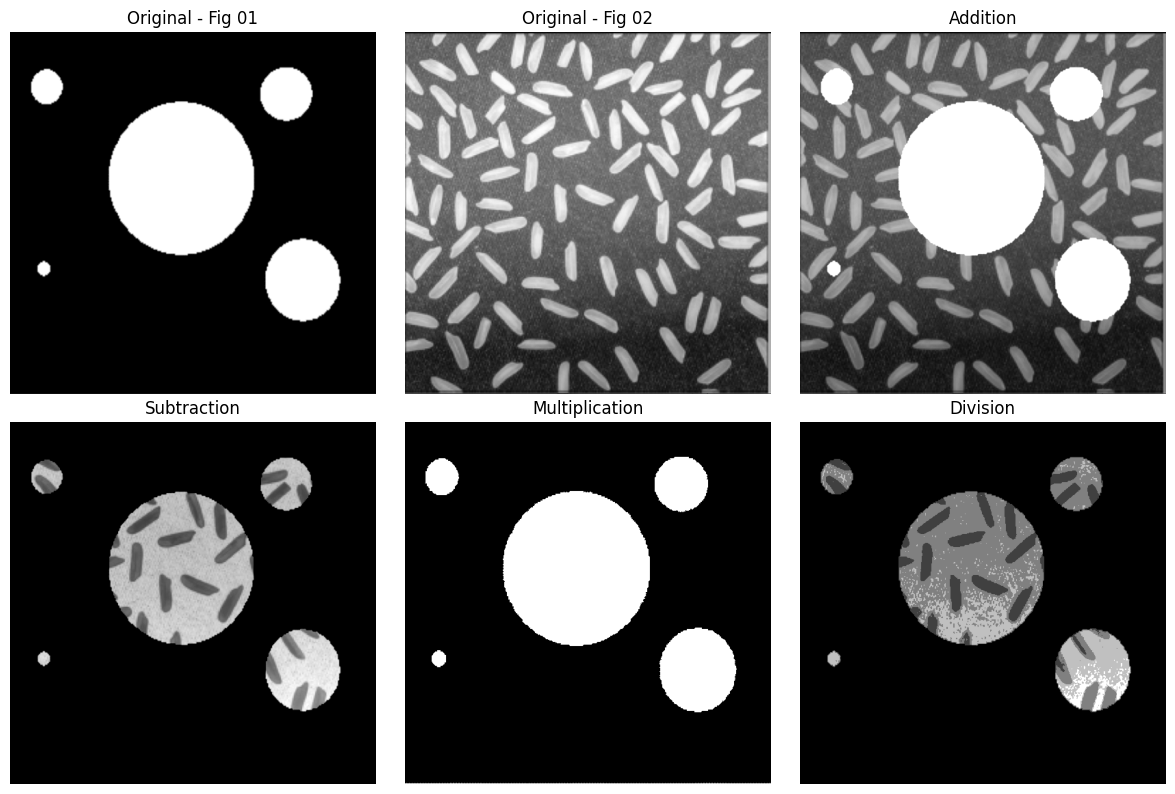

In [17]:
# Resize images to same shape if necessary
fig_02 = cv2.resize(fig_02, (fig_01.shape[1], fig_01.shape[0]))

# Pixel-wise operations
add_img = cv2.add(fig_01, fig_02)
sub_img = cv2.subtract(fig_01, fig_02)
mult_img = cv2.multiply(fig_01, fig_02)
div_img = cv2.divide(fig_01, fig_02 + 1)  # add 1 to avoid division by zero

# Display results using matplotlib
titles = ['Original - Fig 01', 'Original - Fig 02', 'Addition', 'Subtraction', 'Multiplication', 'Division']
images = [fig_01, fig_02, add_img, sub_img, mult_img, div_img]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Q6.	Apply the following operations using Fig.1 and Fig.2:
a.	AND 
b.	OR
c.	NOT



# Answer 6

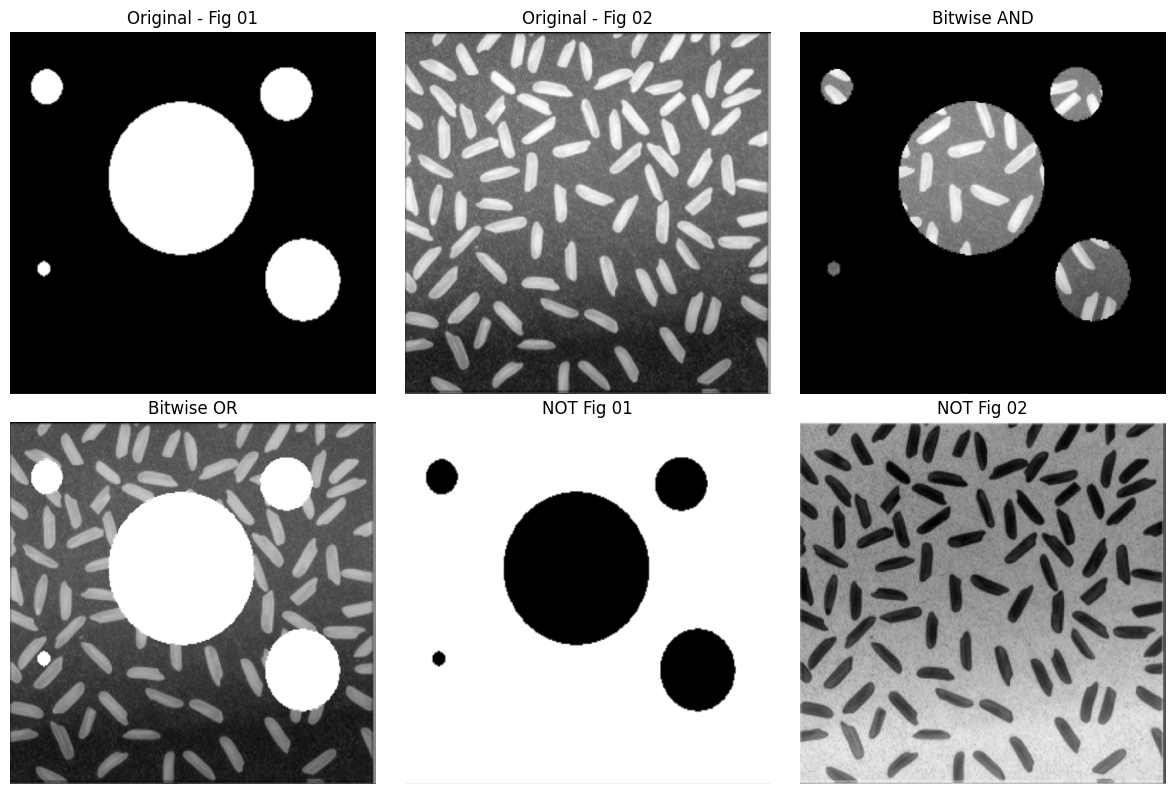

In [18]:
# Resize to match sizes if needed
fig_02 = cv2.resize(fig_02, (fig_01.shape[1], fig_01.shape[0]))

# a. Bitwise AND
and_img = cv2.bitwise_and(fig_01, fig_02)

# b. Bitwise OR
or_img = cv2.bitwise_or(fig_01, fig_02)

# c. Bitwise NOT
not_img_01 = cv2.bitwise_not(fig_01)
not_img_02 = cv2.bitwise_not(fig_02)

# Display results
titles = ['Original - Fig 01', 'Original - Fig 02', 'Bitwise AND', 'Bitwise OR', 'NOT Fig 01', 'NOT Fig 02']
images = [fig_01, fig_02, and_img, or_img, not_img_01, not_img_02]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Q7. Adjust the contrast of the following image.

# Answer 7

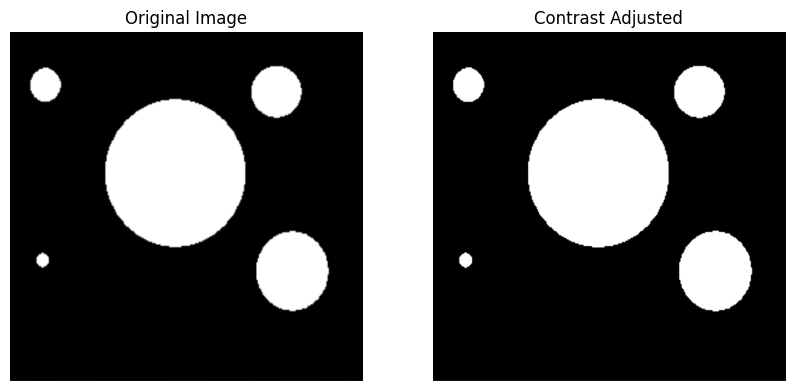

In [21]:
# Parameters for contrast and brightness
alpha = 1.5  # Contrast control (1.0-3.0)
beta = 0     # Brightness control (0-100)

# Adjust contrast and brightness
adjusted = cv2.convertScaleAbs(fig_01, alpha=alpha, beta=beta)

# Show original and adjusted images
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(fig_01, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Contrast Adjusted')
plt.imshow(adjusted, cmap='gray')
plt.axis('off')

plt.show()